In [1]:
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_folder = Path("../../Education_dataset_V2")
os.listdir(data_folder)

['sinhvien_dtb_hocky.xlsx',
 'diem_Thu.xlsx',
 'Education_dataset_V2.rar',
 'sinhvien_dtb_toankhoa.xlsx',
 'uit_hocphi_miengiam.xlsx',
 '12.baoluu.xlsx',
 '14.totnghiep.xlsx',
 'diemrl.xlsx',
 '08.XLHV.xlsx',
 '05.ThiSinh.xlsx',
 '00.ghichu.txt',
 '03.sinhvien_chungchi.xlsx',
 '00_dhcntt-dtdh_19-01-2016_scan.pdf',
 '04.xeploaiav.xlsx',
 '10.diemrl.xlsx',
 '06.giayxacnhan.xlsx',
 '02.diem.xlsx',
 '01.sinhvien.xlsx',
 'desktop.ini']

In [3]:
data_stem = 'uit_hocphi_miengiam'

Initial observation

In [4]:
old_df = pd.read_excel(data_folder/f"{data_stem}.xlsx")
new_df = old_df.copy(deep = True)

In [5]:
old_df.sample(3)

,id,mssv,hocky,namhoc,doituong,miengiam,ghichu
278,279,515E33A9XPvAibaEXe/stw5d/QtwDC3RGrMYF2N8,2,2014,DTTS +hộ nghèo/cận nghèo,100,NaN
3074,3206,364B9763XPvAibaEXe+SIoKUNff6nJS9tRl8cEDE,2,2019,NaN,446600,Giảm 7% HP hỗ trợ ảnh hưởng dịch COVID-19
4552,4704,92CA5CD2XPvAibaEXe+PYhTHWVfmAiLQeBANkmsc,2,2019,NaN,112000,Giảm 7% HP hỗ trợ ảnh hưởng dịch COVID-19


In [6]:
old_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5652 entries, 0 to 5651
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5652 non-null   int64 
 1   mssv      5652 non-null   object
 2   hocky     5652 non-null   int64 
 3   namhoc    5652 non-null   int64 
 4   doituong  429 non-null    object
 5   miengiam  5652 non-null   int64 
 6   ghichu    5367 non-null   object
dtypes: int64(4), object(3)
memory usage: 309.2+ KB


In [7]:
old_df.describe()

,id,hocky,namhoc,miengiam
count,5652.000000,5652.000000,5652.000000,5.652000e+03
mean,2932.934713,1.957360,2018.620842,6.303078e+05
std,1684.359366,0.202061,1.342344,4.910694e+05
min,1.000000,1.000000,2013.000000,5.000000e+01
25%,1482.750000,2.000000,2019.000000,3.710000e+05
50%,2953.500000,2.000000,2019.000000,3.710000e+05
75%,4381.250000,2.000000,2019.000000,1.050000e+06
max,5899.000000,2.000000,2019.000000,3.250000e+06


In [8]:
new_df.drop('id', axis=1, inplace=True)

ghichu - Handle duplication

In [9]:
new_df['ghichu'].value_counts()

ghichu
Giảm 7% HP hỗ trợ ảnh hưởng dịch COVID-19                                                                                     5180
Người có công với cách mạng và thân nhân của người có công với cách mạng theo Pháp lệnh ưu đãi người có công                   123
Giam 7% hoc phi do Covid                                                                                                        24
Giam 7% hoc phi do dich Covid 19                                                                                                19
Học sinh, sinh viên người dân tộc thiểu số rất ít người ở vùng có điều kiện kinh tế - xã hội khó khăn và đặc biệt khó khăn      13
Đối tượng giảm 50% học phí                                                                                                       8
Name: count, dtype: int64

In [10]:
mapping_dict = {
    'Giảm 7% HP hỗ trợ ảnh hưởng dịch COVID-19': 'Giảm 7% học phí do ảnh hưởng của dịch COVID-19',
    'Giam 7% hoc phi do Covid': 'Giảm 7% học phí do ảnh hưởng của dịch COVID-19',
    'Giam 7% hoc phi do dich Covid 19': 'Giảm 7% học phí do ảnh hưởng của dịch COVID-19'
}
new_df['ghichu'] = new_df['ghichu'].replace(mapping_dict)
new_df['ghichu'] = new_df['ghichu'].astype('category')
new_df['ghichu'].value_counts()

ghichu
Giảm 7% học phí do ảnh hưởng của dịch COVID-19                                                                                5223
Người có công với cách mạng và thân nhân của người có công với cách mạng theo Pháp lệnh ưu đãi người có công                   123
Học sinh, sinh viên người dân tộc thiểu số rất ít người ở vùng có điều kiện kinh tế - xã hội khó khăn và đặc biệt khó khăn      13
Đối tượng giảm 50% học phí                                                                                                       8
Name: count, dtype: int64

hocky - Handle duplication

In [11]:
new_df.hocky.value_counts(dropna=False)

hocky
2    5411
1     241
Name: count, dtype: int64

In [12]:
mapping_dict = {
    1: '1',
    2: '2',
}

new_df.hocky = new_df.hocky.replace(mapping_dict).astype('category')

namhoc - Handle duplication

In [13]:
new_df.namhoc.value_counts(dropna=False)

namhoc
2019    5223
2015     146
2013     144
2014     139
Name: count, dtype: int64

In [14]:
mapping_dict = {
    2019: '2019',
    2015: '2015',
    2014: '2014',
    2013: '2013',
}

new_df.namhoc = new_df.namhoc.replace(mapping_dict).astype('category')

doituong - Handle duplication

In [15]:
new_df['doituong'].value_counts()

doituong
Con thương binh                                                                                                    266
Con bệnh binh                                                                                                       55
DTTS + hộ nghèo/cận nghèo                                                                                           21
DTTS +hộ nghèo/cận nghèo                                                                                            18
Cha (mẹ) bị TNLĐ/TNNN                                                                                               14
Dân tộc thiểu số +hộ nghèo/cận nghèo                                                                                12
Cha (mẹ) bị nhiễm CĐHH                                                                                              11
Cha (mẹ) là cán bộ, công nhân, viên chức bị TNLĐ/TNNN hoặc mắc bệnh nghề nghiệp được hưởng trợ cấp thường xuyên      8
Sinh viên bị khuyết tật                

In [16]:
dtts_ngheo = "Dân tộc thiểu số + hộ nghèo/cận nghèo"
mapping_dict = {
    'DTTS + Hộ nghèo/cận nghèo': dtts_ngheo,
    'DTTS + hộ nghèo/cận nghèo': dtts_ngheo,
    'DTTS +hộ nghèo/cận nghèo': dtts_ngheo,
    'Dân tộc thiểu số + hộ nghèo/cận nghèo': dtts_ngheo,
    'Dân tộc thiểu số +hộ nghèo/cận nghèo': dtts_ngheo,
    'Sinh viên bị khuyết tật': 'SV khuyết tật',
    # 'Cha (mẹ) hoạt động kháng chiến bị nhiễm chất độc hóa học': 'Cha (mẹ) bị nhiễm CĐHH',
    # 'Cha (mẹ) là cán bộ, công nhân, viên chức bị TNLĐ/TNNN hoặc mắc bệnh nghề nghiệp được hưởng trợ cấp thường xuyên': 'Cha (mẹ) bị TNLĐ/TNNN',
}
new_df['doituong'] = new_df['doituong'].replace(mapping_dict)
new_df['doituong'] = new_df['doituong'].astype('category')

new_df['doituong'].value_counts()

doituong
Con thương binh                                                                                                    266
Con bệnh binh                                                                                                       55
Dân tộc thiểu số + hộ nghèo/cận nghèo                                                                               53
Cha (mẹ) bị TNLĐ/TNNN                                                                                               14
Cha (mẹ) bị nhiễm CĐHH                                                                                              11
SV khuyết tật                                                                                                       11
Cha (mẹ) là cán bộ, công nhân, viên chức bị TNLĐ/TNNN hoặc mắc bệnh nghề nghiệp được hưởng trợ cấp thường xuyên      8
Cha (mẹ) hoạt động kháng chiến bị nhiễm chất độc hóa học                                                             6
DTTS rất ít người                      

mssv - Handle duplication

In [17]:
new_df['mssv'] = new_df['mssv'].astype('category')

new_df['mssv'].value_counts()

mssv
52A13A56XPvAibaEXe8Y+/3uR2PkTBzKGlmHNdAe    6
66B24040XPvAibaEXe+wmtNhlfgIwn9iSiemRgPv    6
5EA0E379XPvAibaEXe9Xnw4t0GPgx3ZLzmzrJTA6    6
740BF475XPvAibaEXe80gGmWuNekT0DMGoGib8Ko    6
B07B894BXPvAibaEXe8s1xx8DWM0quj3PKFHHyHD    6
                                           ..
56626D79XPvAibaEXe+D5C9Re7EGLcLpN9AoumiF    1
566261C0XPvAibaEXe+HeL85QGo03a9hUZtbafsZ    1
56587D9CXPvAibaEXe++B0JyCbXA1D+9N1erNAGS    1
56535DAEXPvAibaEXe/pS44gx8Fm9j1XdP/cQelm    1
FFFA4234XPvAibaEXe+OhmjSj4XEzdTGgcTdT9fT    1
Name: count, Length: 5341, dtype: int64

miengiam - Handle duplication

In [18]:
new_df['miengiam'].value_counts()

miengiam
1050000    1655
371000     1559
112000      779
100         388
1400000     218
           ... 
2520000       1
369600        1
478800        1
432600        1
85750         1
Name: count, Length: 189, dtype: int64

In [19]:
new_df.loc[new_df.miengiam <= 100, 'miengiam'].value_counts()

miengiam
100    388
50      22
70       2
Name: count, dtype: int64

Handle missing data

In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5652 entries, 0 to 5651
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   mssv      5652 non-null   category
 1   hocky     5652 non-null   category
 2   namhoc    5652 non-null   category
 3   doituong  429 non-null    category
 4   miengiam  5652 non-null   int64   
 5   ghichu    5367 non-null   category
dtypes: category(5), int64(1)
memory usage: 249.1 KB


In [21]:
new_df[["doituong", 'ghichu']].drop_duplicates()

,doituong,ghichu
0,Con thương binh,Người có công với cách mạng và thân nhân của n...
2,Dân tộc thiểu số + hộ nghèo/cận nghèo,"Học sinh, sinh viên người dân tộc thiểu số rất..."
8,Con bệnh binh,Người có công với cách mạng và thân nhân của n...
23,"Cha (mẹ) là cán bộ, công nhân, viên chức bị TN...",Đối tượng giảm 50% học phí
27,Cha (mẹ) hoạt động kháng chiến bị nhiễm chất đ...,Người có công với cách mạng và thân nhân của n...
144,Con thương binh,NaN
186,Con bệnh binh,NaN
196,Cha (mẹ) bị nhiễm CĐHH,NaN
199,Dân tộc thiểu số + hộ nghèo/cận nghèo,NaN
205,Cha (mẹ) bị TNLĐ/TNNN,NaN


...

In [22]:
fill_value = 'SV bị ảnh hưởng bởi dịch COVID-19'
new_df.doituong = new_df.doituong.cat.add_categories([fill_value])
new_df.doituong.fillna(value=fill_value, inplace=True)
new_df[["doituong", 'ghichu']].drop_duplicates()

,doituong,ghichu
0,Con thương binh,Người có công với cách mạng và thân nhân của n...
2,Dân tộc thiểu số + hộ nghèo/cận nghèo,"Học sinh, sinh viên người dân tộc thiểu số rất..."
8,Con bệnh binh,Người có công với cách mạng và thân nhân của n...
23,"Cha (mẹ) là cán bộ, công nhân, viên chức bị TN...",Đối tượng giảm 50% học phí
27,Cha (mẹ) hoạt động kháng chiến bị nhiễm chất đ...,Người có công với cách mạng và thân nhân của n...
144,Con thương binh,NaN
186,Con bệnh binh,NaN
196,Cha (mẹ) bị nhiễm CĐHH,NaN
199,Dân tộc thiểu số + hộ nghèo/cận nghèo,NaN
205,Cha (mẹ) bị TNLĐ/TNNN,NaN


In [23]:
haha = new_df[["hocky", "namhoc", "miengiam", "doituong", "ghichu"]].drop_duplicates().sort_values(by=["doituong", "ghichu", "namhoc", "hocky"])
haha

,hocky,namhoc,miengiam,doituong,ghichu
205,1,2014,50,Cha (mẹ) bị TNLĐ/TNNN,NaN
271,2,2014,50,Cha (mẹ) bị TNLĐ/TNNN,NaN
301,1,2015,50,Cha (mẹ) bị TNLĐ/TNNN,NaN
366,2,2015,50,Cha (mẹ) bị TNLĐ/TNNN,NaN
196,1,2014,100,Cha (mẹ) bị nhiễm CĐHH,NaN
...,...,...,...,...,...
5603,2,2019,389060,SV bị ảnh hưởng bởi dịch COVID-19,Giảm 7% học phí do ảnh hưởng của dịch COVID-19
5604,2,2019,515060,SV bị ảnh hưởng bởi dịch COVID-19,Giảm 7% học phí do ảnh hưởng của dịch COVID-19
5613,2,2019,439460,SV bị ảnh hưởng bởi dịch COVID-19,Giảm 7% học phí do ảnh hưởng của dịch COVID-19
5624,2,2019,1183000,SV bị ảnh hưởng bởi dịch COVID-19,Giảm 7% học phí do ảnh hưởng của dịch COVID-19


In [24]:
print(haha.to_markdown())

|      |   hocky |   namhoc |   miengiam | doituong                                                                                                        | ghichu                                                                                                                     |
|-----:|--------:|---------:|-----------:|:----------------------------------------------------------------------------------------------------------------|:---------------------------------------------------------------------------------------------------------------------------|
|  205 |       1 |     2014 |         50 | Cha (mẹ) bị TNLĐ/TNNN                                                                                           | nan                                                                                                                        |
|  271 |       2 |     2014 |         50 | Cha (mẹ) bị TNLĐ/TNNN                                                                                          

In [25]:
haha = new_df["miengiam"].value_counts().reset_index()
haha.columns = ['miengiam', 'count']
haha.sort_values(by=["miengiam"], inplace=True)
# print(haha.to_markdown())
haha.head()

,miengiam,count
16,50,22
77,70,2
3,100,388
19,75600,18
151,84700,1


In [26]:
mapping_dict = new_df.drop_duplicates(subset='doituong').set_index('doituong')['miengiam']
mapping_dict['SV bị ảnh hưởng bởi dịch COVID-19'] = 7
mapping_dict

doituong
Con thương binh                                                                                                    100
Dân tộc thiểu số + hộ nghèo/cận nghèo                                                                              100
Con bệnh binh                                                                                                      100
Cha (mẹ) là cán bộ, công nhân, viên chức bị TNLĐ/TNNN hoặc mắc bệnh nghề nghiệp được hưởng trợ cấp thường xuyên     50
Cha (mẹ) hoạt động kháng chiến bị nhiễm chất độc hóa học                                                           100
Cha (mẹ) bị nhiễm CĐHH                                                                                             100
Cha (mẹ) bị TNLĐ/TNNN                                                                                               50
SV khuyết tật                                                                                                      100
SV mồ côi                              

In [27]:
new_df['phan_tram_mien_giam'] = None
new_df['phan_tram_mien_giam'].fillna(new_df['doituong'].map(mapping_dict), inplace=True)
new_df[["phan_tram_mien_giam", "miengiam"]].drop_duplicates().sort_values(by=["phan_tram_mien_giam", "miengiam"])

,phan_tram_mien_giam,miengiam
429,7,75600
537,7,84700
499,7,85750
453,7,92400
436,7,100800
...,...,...
23,50,50
423,70,70
0,100,100
76,100,2825000


In [28]:
new_df.loc[new_df['miengiam'] <= 100, 'miengiam'] = None
new_df.drop('ghichu', axis=1, inplace=True)
new_df.sample(3)


,mssv,hocky,namhoc,doituong,miengiam,phan_tram_mien_giam
4127,B5453DB8XPvAibaEXe+jRlsyXvmhz3fdu48G7zN3,2,2019,SV bị ảnh hưởng bởi dịch COVID-19,1050000.0,7
933,3237312AXPvAibaEXe9BgVwdGgzpaWPBzMunWFH4,2,2019,SV bị ảnh hưởng bởi dịch COVID-19,1260000.0,7
432,07623563XPvAibaEXe/GqyBZHXBWrpbQSsVrrRwi,2,2019,SV bị ảnh hưởng bởi dịch COVID-19,201600.0,7


In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5652 entries, 0 to 5651
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   mssv                 5652 non-null   category
 1   hocky                5652 non-null   category
 2   namhoc               5652 non-null   category
 3   doituong             5652 non-null   category
 4   miengiam             5240 non-null   float64 
 5   phan_tram_mien_giam  5652 non-null   int64   
dtypes: category(4), float64(1), int64(1)
memory usage: 287.5 KB


In [30]:
haha = new_df[["namhoc", "hocky", "miengiam", "phan_tram_mien_giam"]].drop_duplicates().sort_values(by=["namhoc", "hocky"])[new_df.phan_tram_mien_giam != 7]
print(haha.to_markdown())

|     |   namhoc |   hocky |    miengiam |   phan_tram_mien_giam |
|----:|---------:|--------:|------------:|----------------------:|
|   0 |     2013 |       1 | nan         |                   100 |
|  23 |     2013 |       1 | nan         |                    50 |
|  76 |     2013 |       1 |   2.825e+06 |                   100 |
|  79 |     2013 |       2 | nan         |                   100 |
|  88 |     2013 |       2 | nan         |                    50 |
| 141 |     2013 |       2 |   2.825e+06 |                   100 |
| 144 |     2014 |       1 | nan         |                   100 |
| 145 |     2014 |       1 |   3.25e+06  |                   100 |
| 205 |     2014 |       1 | nan         |                    50 |
| 228 |     2014 |       2 | nan         |                   100 |
| 237 |     2014 |       2 |   3.25e+06  |                   100 |
| 271 |     2014 |       2 | nan         |                    50 |
| 283 |     2015 |       1 | nan         |                   1

C:\Users\vuhh2\AppData\Local\Temp\ipykernel_20580\3914017091.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  haha = new_df[["namhoc", "hocky", "miengiam", "phan_tram_mien_giam"]].drop_duplicates().sort_values(by=["namhoc", "hocky"])[new_df.phan_tram_mien_giam != 7]


In [31]:
haha = new_df[["namhoc", "hocky", "miengiam", "phan_tram_mien_giam"]].drop_duplicates().sort_values(by=["namhoc", "hocky"])[(new_df.phan_tram_mien_giam != 7) & (new_df.miengiam.notnull())]
print(haha.to_markdown())

|     |   namhoc |   hocky |   miengiam |   phan_tram_mien_giam |
|----:|---------:|--------:|-----------:|----------------------:|
|  76 |     2013 |       1 |  2.825e+06 |                   100 |
| 141 |     2013 |       2 |  2.825e+06 |                   100 |
| 145 |     2014 |       1 |  3.25e+06  |                   100 |
| 237 |     2014 |       2 |  3.25e+06  |                   100 |
| 330 |     2015 |       1 |  3.25e+06  |                   100 |
| 395 |     2015 |       2 |  3.25e+06  |                   100 |


C:\Users\vuhh2\AppData\Local\Temp\ipykernel_20580\4202978418.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  haha = new_df[["namhoc", "hocky", "miengiam", "phan_tram_mien_giam"]].drop_duplicates().sort_values(by=["namhoc", "hocky"])[(new_df.phan_tram_mien_giam != 7) & (new_df.miengiam.notnull())]


In [32]:
hoc_phi = new_df.drop_duplicates(subset=["namhoc", "hocky", "miengiam"])[(new_df.phan_tram_mien_giam != 7) & (new_df.miengiam.notnull())].set_index(['namhoc', 'hocky']).miengiam
hoc_phi

C:\Users\vuhh2\AppData\Local\Temp\ipykernel_20580\4091373130.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hoc_phi = new_df.drop_duplicates(subset=["namhoc", "hocky", "miengiam"])[(new_df.phan_tram_mien_giam != 7) & (new_df.miengiam.notnull())].set_index(['namhoc', 'hocky']).miengiam


namhoc  hocky
2013    1        2825000.0
        2        2825000.0
2014    1        3250000.0
        2        3250000.0
2015    1        3250000.0
        2        3250000.0
Name: miengiam, dtype: float64

In [33]:
def replace_miengiam_null(row):
    global hoc_phi
    if pd.isnull(row.miengiam):
        return hoc_phi[(row.namhoc, row.hocky)] * row.phan_tram_mien_giam / 100
    return row.miengiam
new_df.miengiam = new_df.apply(replace_miengiam_null, axis=1)

haha = new_df[["namhoc", "hocky", "miengiam", "phan_tram_mien_giam"]].drop_duplicates().sort_values(by=["namhoc", "hocky"])[new_df.phan_tram_mien_giam != 7]
print(haha.to_markdown())

|     |   namhoc |   hocky |   miengiam |   phan_tram_mien_giam |
|----:|---------:|--------:|-----------:|----------------------:|
|   0 |     2013 |       1 | 2.825e+06  |                   100 |
|  23 |     2013 |       1 | 1.4125e+06 |                    50 |
|  79 |     2013 |       2 | 2.825e+06  |                   100 |
|  88 |     2013 |       2 | 1.4125e+06 |                    50 |
| 144 |     2014 |       1 | 3.25e+06   |                   100 |
| 205 |     2014 |       1 | 1.625e+06  |                    50 |
| 228 |     2014 |       2 | 3.25e+06   |                   100 |
| 271 |     2014 |       2 | 1.625e+06  |                    50 |
| 283 |     2015 |       1 | 3.25e+06   |                   100 |
| 301 |     2015 |       1 | 1.625e+06  |                    50 |
| 361 |     2015 |       2 | 3.25e+06   |                   100 |
| 366 |     2015 |       2 | 1.625e+06  |                    50 |
| 423 |     2015 |       2 | 2.275e+06  |                    70 |


C:\Users\vuhh2\AppData\Local\Temp\ipykernel_20580\177458024.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  haha = new_df[["namhoc", "hocky", "miengiam", "phan_tram_mien_giam"]].drop_duplicates().sort_values(by=["namhoc", "hocky"])[new_df.phan_tram_mien_giam != 7]


In [34]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5652 entries, 0 to 5651
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   mssv                 5652 non-null   category
 1   hocky                5652 non-null   category
 2   namhoc               5652 non-null   category
 3   doituong             5652 non-null   category
 4   miengiam             5652 non-null   float64 
 5   phan_tram_mien_giam  5652 non-null   int64   
dtypes: category(4), float64(1), int64(1)
memory usage: 287.5 KB


In [35]:
new_df.miengiam.describe()

count    5.652000e+03
mean     8.503113e+05
std      7.690674e+05
min      7.560000e+04
25%      3.710000e+05
50%      4.970000e+05
75%      1.050000e+06
max      3.250000e+06
Name: miengiam, dtype: float64

In [36]:
haha = new_df["miengiam"].value_counts().reset_index()
haha.columns = ['miengiam', 'count']
haha.sort_values(by=["miengiam"], inplace=True)
# print(haha.to_markdown())
haha.head()

,miengiam,count
19,75600.0,18
151,84700.0,1
188,85750.0,1
50,92400.0,4
21,100800.0,17


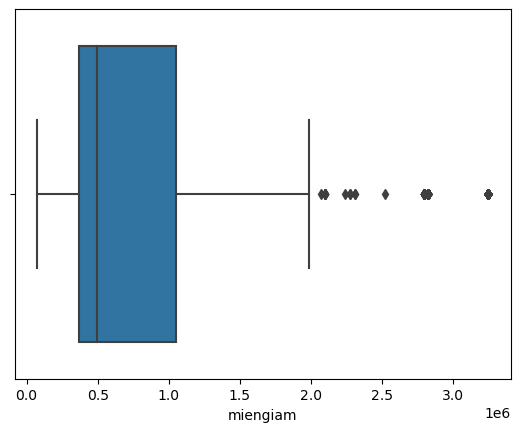

In [37]:
sns.boxplot(x=new_df['miengiam'])
plt.show()

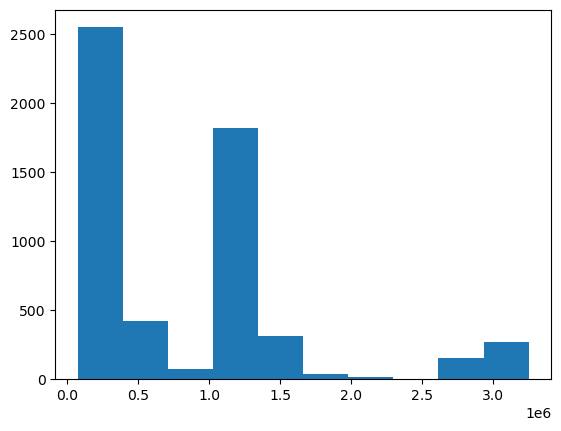

In [38]:
plt.hist(new_df['miengiam'], bins=10)
plt.show()

primary_key check

In [39]:
primary_key = ['mssv', 'hocky', 'namhoc']
new_df[primary_key].duplicated().sum()

0

Format column names

In [40]:
old_df.columns

Index(['id', 'mssv', 'hocky', 'namhoc', 'doituong', 'miengiam', 'ghichu'], dtype='object')

In [41]:
new_df.columns = ['mssv', 'hoc_ky', 'nam_hoc', 'doi_tuong', 'mien_giam', 'phan_tram_mien_giam']
new_df.columns

Index(['mssv', 'hoc_ky', 'nam_hoc', 'doi_tuong', 'mien_giam',
       'phan_tram_mien_giam'],
      dtype='object')

Final check

In [42]:
new_df.hoc_ky = new_df.hoc_ky.astype('category')
new_df.nam_hoc = new_df.nam_hoc.astype('category')
new_df.mien_giam = new_df.mien_giam.astype('float32')
new_df.phan_tram_mien_giam = new_df.phan_tram_mien_giam.astype('float32')

In [43]:
old_df.sample(3)

,id,mssv,hocky,namhoc,doituong,miengiam,ghichu
5030,5188,9838A646XPvAibaEXe/Jc8h2JxO5QbKDfW+35ySv,2,2019,NaN,112000,Giảm 7% HP hỗ trợ ảnh hưởng dịch COVID-19
5212,5375,B1B996D1XPvAibaEXe/VQHzzHDYACRfsgbqiwflU,2,2019,NaN,1050000,Giảm 7% HP hỗ trợ ảnh hưởng dịch COVID-19
3771,3908,0F4E2E19XPvAibaEXe+KnWgScvZ27HdNiwaSUUic,2,2019,NaN,371000,Giảm 7% HP hỗ trợ ảnh hưởng dịch COVID-19


In [44]:
new_df.sample(3)

,mssv,hoc_ky,nam_hoc,doi_tuong,mien_giam,phan_tram_mien_giam
4762,5135E5A2XPvAibaEXe/KP8Z+xE/sY37dNvM38zqE,2,2019,SV bị ảnh hưởng bởi dịch COVID-19,1050000.0,7.0
4990,4ABE187CXPvAibaEXe94sKKoWENjB1kc5S0oZHFw,2,2019,SV bị ảnh hưởng bởi dịch COVID-19,1050000.0,7.0
393,25C15555XPvAibaEXe9M021iVaAwIGned3/1O2WJ,2,2015,Con thương binh,3250000.0,100.0


In [45]:
old_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5652 entries, 0 to 5651
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5652 non-null   int64 
 1   mssv      5652 non-null   object
 2   hocky     5652 non-null   int64 
 3   namhoc    5652 non-null   int64 
 4   doituong  429 non-null    object
 5   miengiam  5652 non-null   int64 
 6   ghichu    5367 non-null   object
dtypes: int64(4), object(3)
memory usage: 309.2+ KB


In [46]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5652 entries, 0 to 5651
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   mssv                 5652 non-null   category
 1   hoc_ky               5652 non-null   category
 2   nam_hoc              5652 non-null   category
 3   doi_tuong            5652 non-null   category
 4   mien_giam            5652 non-null   float32 
 5   phan_tram_mien_giam  5652 non-null   float32 
dtypes: category(4), float32(2)
memory usage: 243.4 KB


In [47]:
old_df.describe()

,id,hocky,namhoc,miengiam
count,5652.000000,5652.000000,5652.000000,5.652000e+03
mean,2932.934713,1.957360,2018.620842,6.303078e+05
std,1684.359366,0.202061,1.342344,4.910694e+05
min,1.000000,1.000000,2013.000000,5.000000e+01
25%,1482.750000,2.000000,2019.000000,3.710000e+05
50%,2953.500000,2.000000,2019.000000,3.710000e+05
75%,4381.250000,2.000000,2019.000000,1.050000e+06
max,5899.000000,2.000000,2019.000000,3.250000e+06


In [48]:
new_df.describe()

,mien_giam,phan_tram_mien_giam
count,5.652000e+03,5652.000000
mean,8.503113e+05,13.853680
std,7.690674e+05,24.113993
min,7.560000e+04,7.000000
25%,3.710000e+05,7.000000
50%,4.970000e+05,7.000000
75%,1.050000e+06,7.000000
max,3.250000e+06,100.000000


In [49]:
old_df.columns

Index(['id', 'mssv', 'hocky', 'namhoc', 'doituong', 'miengiam', 'ghichu'], dtype='object')

In [50]:
new_df.columns

Index(['mssv', 'hoc_ky', 'nam_hoc', 'doi_tuong', 'mien_giam',
       'phan_tram_mien_giam'],
      dtype='object')

In [51]:
primary_key = ['mssv', 'hocky', 'namhoc']
old_df[primary_key].duplicated().sum()

0

In [52]:
primary_key = ['mssv', 'hoc_ky', 'nam_hoc']
new_df[primary_key].duplicated().sum()

0

# Save clean data

In [53]:
clean_data_folder = Path("../../clean_data")

In [54]:
new_df.to_parquet(clean_data_folder/f"{data_stem}.parquet", index=False)
haha = pd.read_parquet(clean_data_folder/f"{data_stem}.parquet")
haha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5652 entries, 0 to 5651
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   mssv                 5652 non-null   category
 1   hoc_ky               5652 non-null   category
 2   nam_hoc              5652 non-null   category
 3   doi_tuong            5652 non-null   category
 4   mien_giam            5652 non-null   float32 
 5   phan_tram_mien_giam  5652 non-null   float32 
dtypes: category(4), float32(2)
memory usage: 243.4 KB
